In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_od_txt_f1(filename, skiprows, fmt):
#     files with first format include: all "_1_", and "1_2_", "2_2_", "3_2_" skiprows = 6
    data = pd.read_csv(filename, sep="	", skiprows=skiprows)
    plt_name_txt = filename.split("od_readings/",1)[1]
    plt_name = plt_name_txt[0:-13]
    
    if fmt==1:
        data.drop(["Unnamed: 97"], axis=1, inplace=True)
        data.drop(["Well"], axis=1, inplace=True)
        data["Label"] = plt_name
        data.set_index(["Label"], inplace=True)
    else:
        data = data.rename(columns={"Well":"Label","600":plt_name})
        data.set_index(["Label"], inplace=True)
        data = data.T
    
    return data

def read_od_xlsx(filename):
    plt_name_txt = filename.split("will_amd_reader/",1)[1]
    plt_name = plt_name_txt[0:-14]
    data = pd.read_excel(filename, sheet_name="Sheet2", skiprows=22, nrows=96)
    data = data.rename(columns={"<>":"Label","Value":plt_name})
    data = data[["Label",plt_name]]
    data.set_index(["Label"], inplace=True)
    data = data.T
    return data

In [3]:
apareader_data = os.getcwd()
amdreader_data = apareader_data + "/will_amd_reader"
first=True

print("Reading ...")
for entry in os.scandir(apareader_data):
    
    if (entry.path.endswith(".txt")):
        print("     ", entry.path)
        
        if "_1_" in entry.path:
            df = df.append(read_od_txt_f1(entry.path, 2, 1))
            
        elif "1_2_" in entry.path or "2_2_" in entry.path or "3_2_" in entry.path:
            df = df.append(read_od_txt_f1(entry.path, 6, 1))
            
        else:
            if first:
                df = read_od_txt_f1(entry.path, 6, 2)
                first = False
            else:
                df = df.append(read_od_txt_f1(entry.path, 6, 2))

print("\n")
print("Reading ...")
for entry in os.scandir(amdreader_data):
    print("     ", entry.path)
    df = df.append(read_od_xlsx(entry.path))
    

df.index.name = "Label"
df.reset_index(inplace=True)
df["Plate"] = df.Label.apply(lambda x: x[5])
df["Hours"] = df.Label.apply(lambda x: (int(x[7])-1)*24)

Reading ...
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate7_3_20201209.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate1_2_20201208.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate7_1_20201207.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate8_1_20201207.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate6_2_20201208.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate8_3_20201209.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate7_2_20201208.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate1_1_20201207.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate1_3_20201209.txt
      /Users/willsharpless/Documents/Thesis/pairwise_second/od_readings/plate6_1_20201207.txt
      /Users/willsharpless/Documents/Thesis/pair

In [4]:
df.head(56)

,Label,A1,B1,C1,D1,E1,F1,G1,H1,A2,...,A12,B12,C12,D12,E12,F12,G12,H12,Plate,Hours
0,plate7_3,0.0480,0.1870,0.1800,0.6150,0.3140,0.3070,0.3260,0.3720,0.2900,...,0.2780,0.1500,0.2640,0.2750,0.2830,0.2340,0.3080,0.3450,7,48
1,plate1_2,0.0380,0.1160,0.0940,0.1070,0.1430,0.2130,0.2330,0.1480,0.2240,...,0.2050,0.1080,0.1260,0.2030,0.1350,0.0910,0.1860,0.1380,1,24
2,plate7_1,0.0400,0.0450,0.0470,0.0480,0.0500,0.0490,0.0770,0.0800,0.0410,...,0.0610,0.0470,0.0510,0.0610,0.0550,0.0470,0.0660,0.0410,7,0
3,plate8_1,0.0530,0.0580,0.0430,0.0660,0.0500,0.0840,0.0550,0.0490,0.0480,...,0.0530,0.0450,0.0490,0.0560,0.0560,0.0740,0.0600,0.0440,8,0
4,plate6_2,0.0320,0.0980,0.1000,0.1000,0.3200,0.2340,0.2320,0.2320,0.2400,...,0.4060,0.0830,0.0980,0.2290,0.1290,0.2260,0.2130,0.2780,6,24
5,plate8_3,0.0460,0.2090,0.1710,0.1810,0.2980,0.3020,0.3140,0.3260,0.3360,...,0.2930,0.1290,0.0800,0.2650,0.2070,0.2350,0.3070,0.3490,8,48
6,plate7_2,0.0380,0.1060,0.0940,0.1200,0.2750,0.2380,0.2540,0.3140,0.2320,...,0.2670,0.1650,0.0710,0.2540,0.1010,0.2110,0.2860,0.3200,7,24
7,plate1_1,0.0390,0.0400,0.0400,0.0400,0.0390,0.0400,0.0480,0.0390,0.0400,...,0.0380,0.0410,0.0380,0.0430,0.0410,0.0410,0.0450,0.0450,1,0
8,plate1_3,0.0380,0.1430,0.1520,0.1500,0.2070,0.2290,0.2510,0.1990,0.2050,...,0.1970,0.1610,0.1100,0.1720,0.1640,0.1280,0.1830,0.3210,1,48
9,plate6_1,0.0390,0.0430,0.0440,0.0430,0.0460,0.0560,0.0600,0.0410,0.0460,...,0.0480,0.0460,0.0570,0.0610,0.0480,0.0470,0.0500,0.0430,6,0


In [5]:
Gluc_0p31mM = df.loc[df['Plate'] == '1']
Gluc_0p31mM = Gluc_0p31mM.sort_values(by=["Hours"])

Gluc_1mM = df.loc[df['Plate'] == '2']
Gluc_1mM = Gluc_1mM.sort_values(by=["Hours"])

Gluc_3p1mM = df.loc[df['Plate'] == '3']
Gluc_3p1mM = Gluc_3p1mM.sort_values(by=["Hours"])

Gluc_10mM = df.loc[df['Plate'] == '4']
Gluc_10mM = Gluc_10mM.sort_values(by=["Hours"])

Temp_25 = df.loc[df['Plate'] == '5']
Temp_25 = Temp_25.sort_values(by=["Hours"])

Temp_27p5 = df.loc[df['Plate'] == '6']
Temp_27p5 = Temp_27p5.sort_values(by=["Hours"])

Temp_30 = df.loc[df['Plate'] == '7']
Temp_30 = Temp_30.sort_values(by=["Hours"])

Temp_30p5 = df.loc[df['Plate'] == '8']
Temp_30p5 = Temp_30p5.sort_values(by=["Hours"])

In [6]:
Gluc_0p31mM.head(8)

,Label,A1,B1,C1,D1,E1,F1,G1,H1,A2,...,A12,B12,C12,D12,E12,F12,G12,H12,Plate,Hours
7,plate1_1,0.0390,0.0400,0.0400,0.0400,0.0390,0.0400,0.0480,0.0390,0.0400,...,0.0380,0.0410,0.0380,0.0430,0.0410,0.0410,0.0450,0.0450,1,0
1,plate1_2,0.0380,0.1160,0.0940,0.1070,0.1430,0.2130,0.2330,0.1480,0.2240,...,0.2050,0.1080,0.1260,0.2030,0.1350,0.0910,0.1860,0.1380,1,24
8,plate1_3,0.0380,0.1430,0.1520,0.1500,0.2070,0.2290,0.2510,0.1990,0.2050,...,0.1970,0.1610,0.1100,0.1720,0.1640,0.1280,0.1830,0.3210,1,48
34,plate1_4,0.0410,0.0700,0.0920,0.2000,0.1730,0.1630,0.1950,0.1810,0.1740,...,0.1450,0.0880,0.0650,0.1860,0.1650,0.4180,0.1710,0.1590,1,72
38,plate1_5,0.0320,0.3430,0.1030,0.1170,0.1900,0.1960,0.1880,0.5390,0.1820,...,0.1580,0.1010,0.1010,0.2470,0.1890,0.1530,0.2950,0.2690,1,96
48,plate1_6,0.0465,0.0497,0.0756,0.0705,0.1450,0.1261,0.1593,0.1287,0.2790,...,0.1522,0.0796,0.0529,0.2187,0.1502,0.0866,0.1380,0.1821,1,120
45,plate1_7,0.0474,0.0705,0.0706,0.0774,0.1465,0.1282,0.1800,0.1254,0.1419,...,0.1376,0.0877,0.0721,0.1611,0.1567,0.0824,0.1165,0.1188,1,144


In [7]:
lets = ["A","B","C","D","E","F","G","H"]
dfs_gluc = {'0.31mM Glucose':Gluc_0p31mM, '1mM Glucose':Gluc_1mM, '3.1mM Glucose':Gluc_3p1mM, '10mM Glucose':Gluc_10mM}
dfs_gluc_keys = list(dfs_gluc.keys())
dfs_temp = {'25C':Temp_25, '27.5C':Temp_27p5, '30C':Temp_30, '32.5C':Temp_30p5}
dfs_temp_keys = list(dfs_temp.keys())

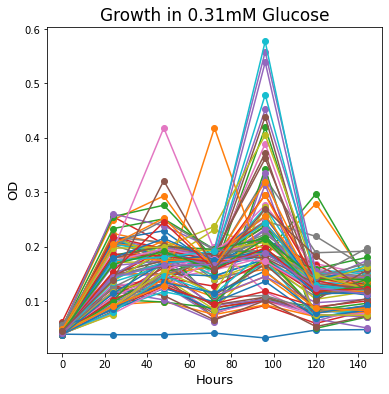

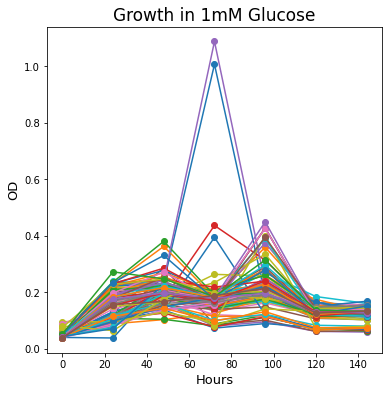

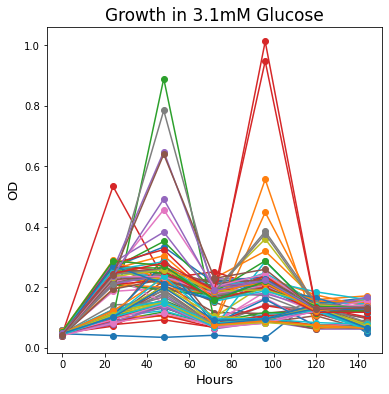

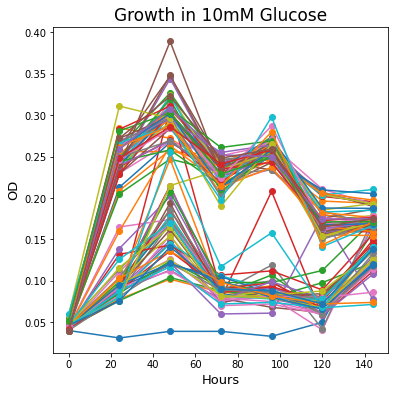

In [8]:
for key,value in dfs_gluc.items():

    df_plot = value

    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(0,8):
        for ii in range(0,12):
            wellc1 = lets[i]+str(ii+1)
            ax.plot(df_plot['Hours'], df_plot[wellc1], marker='o', linestyle='-')

    # ax.legend()
    ax.set_title('Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()

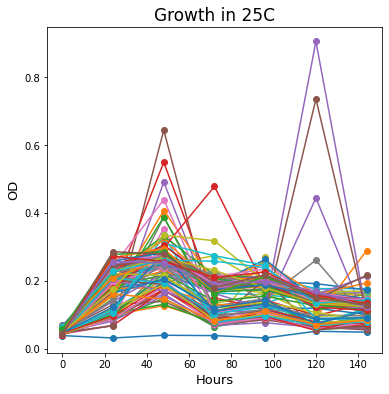

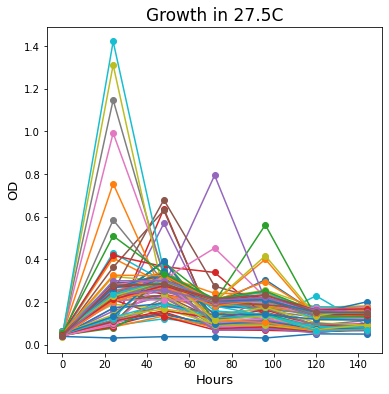

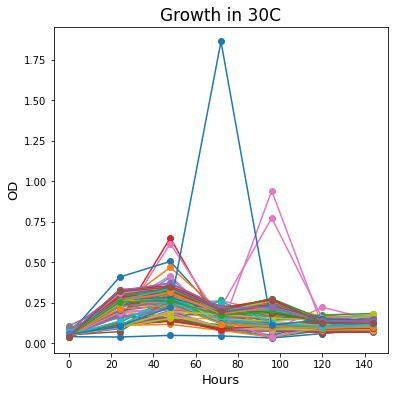

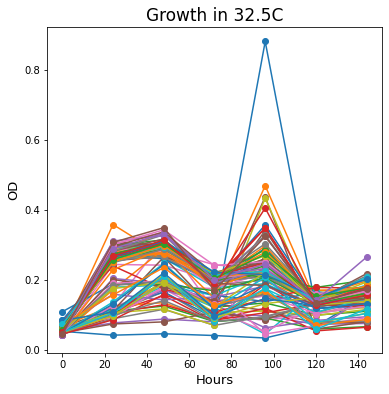

In [9]:
for key,value in dfs_temp.items():

    df_plot = value

    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(0,8):
        for ii in range(0,12):
            wellc1 = lets[i]+str(ii+1)
            ax.plot(df_plot['Hours'], df_plot[wellc1], marker='o', linestyle='-')

    # ax.legend()
    ax.set_title('Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()

In [10]:
Gluc_0p31mM.head(8)


,Label,A1,B1,C1,D1,E1,F1,G1,H1,A2,...,A12,B12,C12,D12,E12,F12,G12,H12,Plate,Hours
7,plate1_1,0.0390,0.0400,0.0400,0.0400,0.0390,0.0400,0.0480,0.0390,0.0400,...,0.0380,0.0410,0.0380,0.0430,0.0410,0.0410,0.0450,0.0450,1,0
1,plate1_2,0.0380,0.1160,0.0940,0.1070,0.1430,0.2130,0.2330,0.1480,0.2240,...,0.2050,0.1080,0.1260,0.2030,0.1350,0.0910,0.1860,0.1380,1,24
8,plate1_3,0.0380,0.1430,0.1520,0.1500,0.2070,0.2290,0.2510,0.1990,0.2050,...,0.1970,0.1610,0.1100,0.1720,0.1640,0.1280,0.1830,0.3210,1,48
34,plate1_4,0.0410,0.0700,0.0920,0.2000,0.1730,0.1630,0.1950,0.1810,0.1740,...,0.1450,0.0880,0.0650,0.1860,0.1650,0.4180,0.1710,0.1590,1,72
38,plate1_5,0.0320,0.3430,0.1030,0.1170,0.1900,0.1960,0.1880,0.5390,0.1820,...,0.1580,0.1010,0.1010,0.2470,0.1890,0.1530,0.2950,0.2690,1,96
48,plate1_6,0.0465,0.0497,0.0756,0.0705,0.1450,0.1261,0.1593,0.1287,0.2790,...,0.1522,0.0796,0.0529,0.2187,0.1502,0.0866,0.1380,0.1821,1,120
45,plate1_7,0.0474,0.0705,0.0706,0.0774,0.1465,0.1282,0.1800,0.1254,0.1419,...,0.1376,0.0877,0.0721,0.1611,0.1567,0.0824,0.1165,0.1188,1,144


In [11]:
# lets = ["B","C","D","E","F","G","H"] 
# dfc = Gluc_0p31mM

# c_7 = 0
# c_12 = 1
# for i in range(1,8):
#     for j in range(i,8):
#         pair = str(i)+"-"+str(j)
#         well1, well2, well3 = lets[c_7] + str(c_12), lets[c_7] + str(c_12 + 1), lets[c_7] + str(c_12 + 2)
#         dfc[pair] = (dfc[well1] + dfc[well2] + dfc[well3])/3
# #         print("Pair: ",pair," At: ",well1," ",well2," ",well3)
#         c_12 = c_12 + 3
#         if c_12 == 13:
#             c_12 = 1
#             c_7 = c_7 + 1

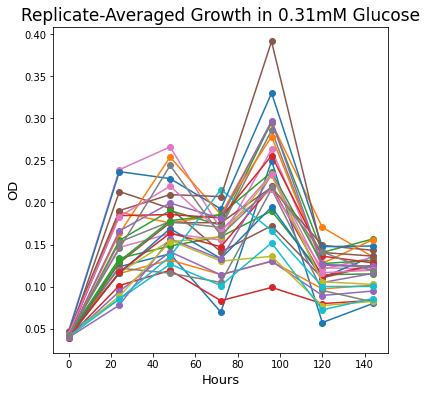

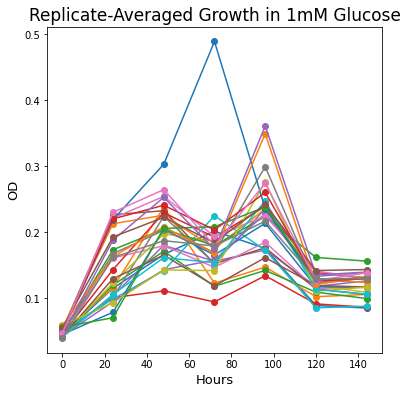

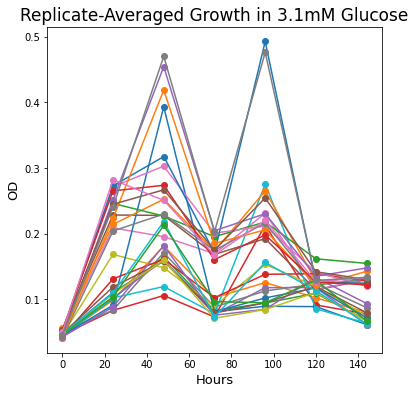

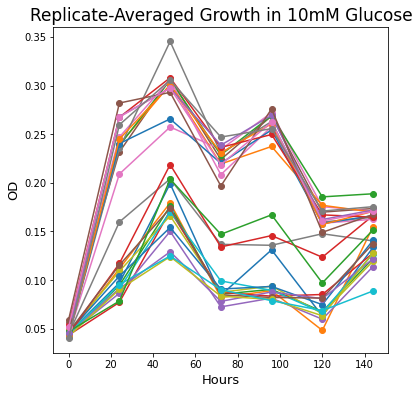

In [12]:
lets = ["B","C","D","E","F","G","H"] 

for key,value in dfs_gluc.items():
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    c_7 = 0
    c_12 = 1
    for i in range(1,8):
        for j in range(i,8):
            pair = str(i)+"-"+str(j)
            well1, well2, well3 = lets[c_7] + str(c_12), lets[c_7] + str(c_12 + 1), lets[c_7] + str(c_12 + 2)
            value[pair] = (value[well1] + value[well2] + value[well3])/3           
            # could do std dev here as well
    #         print("Pair: ",pair," At: ",well1," ",well2," ",well3)
    
            c_12 = c_12 + 3
            if c_12 == 13:
                c_12 = 1
                c_7 = c_7 + 1
            
            ax.plot(value['Hours'], value[pair], marker='o', linestyle='-')
    
    ax.set_title('Replicate-Averaged Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()

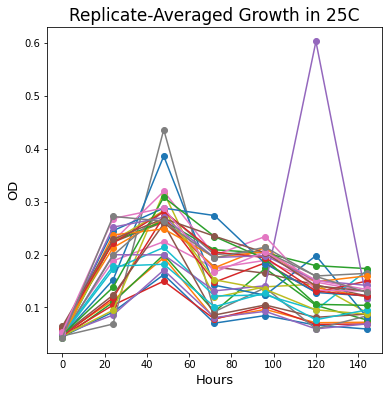

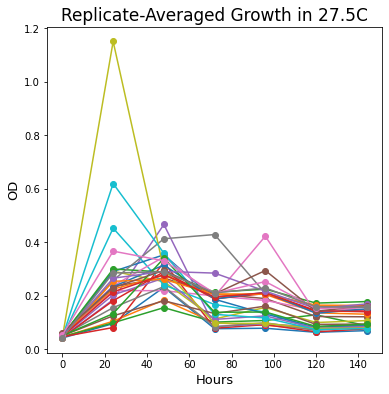

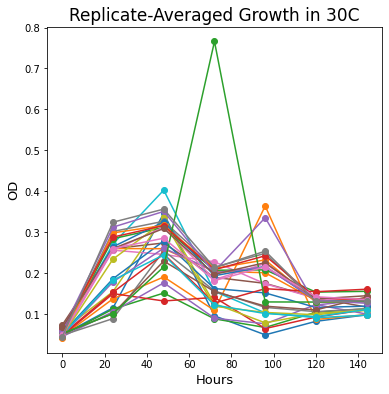

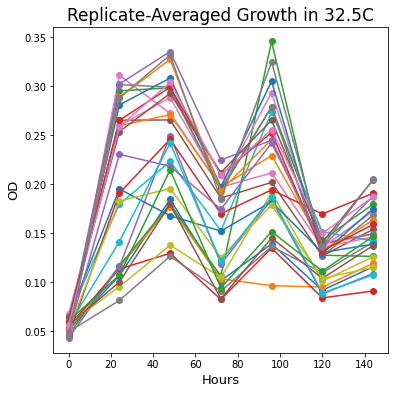

In [13]:
lets = ["B","C","D","E","F","G","H"] 

for key,value in dfs_temp.items():
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    c_7 = 0
    c_12 = 1
    for i in range(1,8):
        for j in range(i,8):
            pair = str(i)+"-"+str(j)
            well1, well2, well3 = lets[c_7] + str(c_12), lets[c_7] + str(c_12 + 1), lets[c_7] + str(c_12 + 2)
            value[pair] = (value[well1] + value[well2] + value[well3])/3           
            # could do std dev here as well
    #         print("Pair: ",pair," At: ",well1," ",well2," ",well3)
    
            c_12 = c_12 + 3
            if c_12 == 13:
                c_12 = 1
                c_7 = c_7 + 1
            
            ax.plot(value['Hours'], value[pair], marker='o', linestyle='-')
    
    ax.set_title('Replicate-Averaged Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()

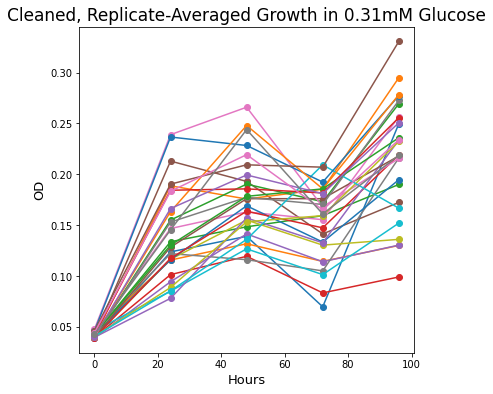

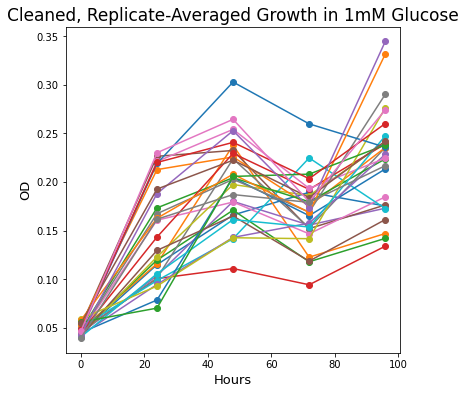

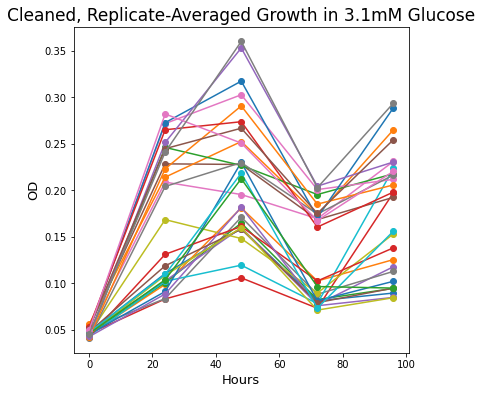

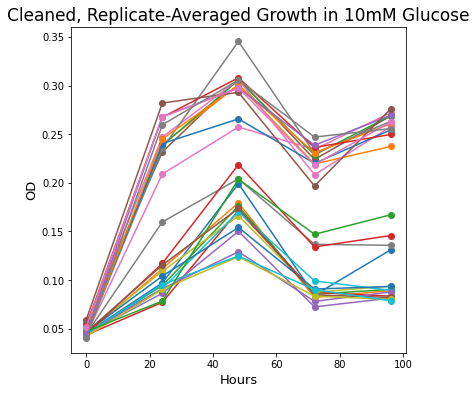

In [14]:
dfs_gluc_cleaned = dfs_gluc

for key, value in dfs_gluc_cleaned.items():
    
    num = value._get_numeric_data()
    num[num > 0.4] = 0.4
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    c_7 = 0
    c_12 = 1
    for i in range(1,8):
        for j in range(i,8):
            pair = str(i)+"-"+str(j)
            well1, well2, well3 = lets[c_7] + str(c_12), lets[c_7] + str(c_12 + 1), lets[c_7] + str(c_12 + 2)
            value[pair] = (value[well1] + value[well2] + value[well3])/3           
            # could do std dev here as well
    #         print("Pair: ",pair," At: ",well1," ",well2," ",well3)
    
            c_12 = c_12 + 3
            if c_12 == 13:
                c_12 = 1
                c_7 = c_7 + 1
            
            ax.plot(value['Hours'][:-2], value[pair][:-2], marker='o', linestyle='-')
    
    ax.set_title('Cleaned, Replicate-Averaged Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()

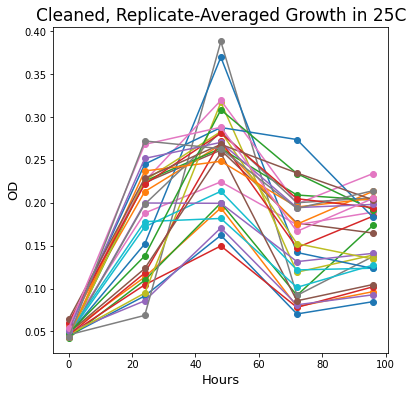

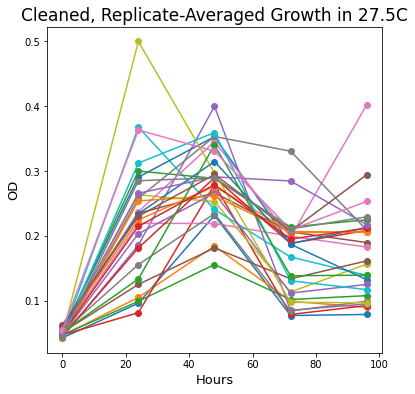

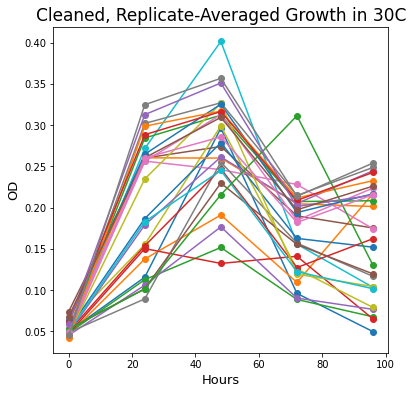

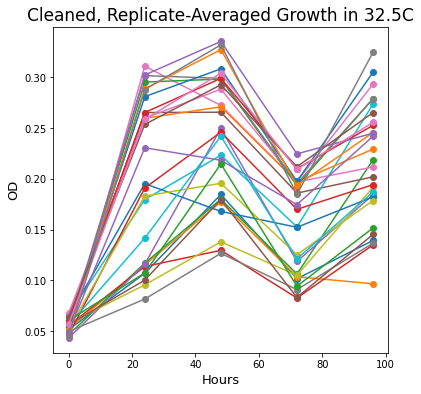

In [15]:
dfs_temp_cleaned = dfs_temp

for key, value in dfs_temp_cleaned.items():
    
    num = value._get_numeric_data()
    num[num > 0.5] = 0.5
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    c_7 = 0
    c_12 = 1
    for i in range(1,8):
        for j in range(i,8):
            pair = str(i)+"-"+str(j)
            well1, well2, well3 = lets[c_7] + str(c_12), lets[c_7] + str(c_12 + 1), lets[c_7] + str(c_12 + 2)
            value[pair] = (value[well1] + value[well2] + value[well3])/3           
            # could do std dev here as well
    #         print("Pair: ",pair," At: ",well1," ",well2," ",well3)
    
            c_12 = c_12 + 3
            if c_12 == 13:
                c_12 = 1
                c_7 = c_7 + 1
            
            ax.plot(value['Hours'][:-2], value[pair][:-2], marker='o', linestyle='-')
    
    ax.set_title('Cleaned, Replicate-Averaged Growth in '+ key, color='black', fontsize='17', ha = 'center')
    ax.set_ylabel('OD', color = 'black', fontsize='13')
    ax.set_xlabel('Hours', color = 'black', fontsize='13')
    plt.show()